# 1.Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from statsmodels.api import qqplot,add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import f1_score, roc_curve , auc
from scipy import stats
from sklearn.metrics import roc_auc_score


import lightgbm as lgb


In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
fontname = 'NanumGothic.ttf' 
fontname = font_manager.FontProperties(fname=fontname).get_name()
plt.style.use('seaborn-white')
rc('font', family=fontname) 

# 2.탐색적분석

In [11]:
df_new_p = pd.read_csv('final_personal.csv')
df_new_p = df_new_p.drop(['Unnamed: 0'],axis = 1,inplace = False)  

# df_new_p[df_new_p['계정수']>=5]

In [13]:
df_new_p

,고객ID,고객유형,생년,거주지,시,구군,남여구분,판매유형,계약유형,유통경로,...,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,연령대,계정수
0,66758234,개인,1979,경기도,경기도,평택시,여자,렌탈,일반,방문판매,...,DES-1,96900,계약확정,0,없음,9,새마을금고,정상,30,1
1,66755948,개인,1982,경기도,경기도,평택시,남자,렌탈,교체렌탈,방문판매,...,DES-1,102900,계약확정,0,없음,2,현대카드,정상,30,2
2,66755948,개인,1982,경기도,경기도,평택시,남자,렌탈,프로모션,방문판매,...,DES-3A,90900,계약확정,0,없음,2,현대카드,정상,30,2
3,66756657,개인,1973,경기도,경기도,평택시,여자,렌탈,일반,홈쇼핑,...,DES-1,96900,계약확정,0,없음,8,우리은행,정상,40,1
4,66423450,개인,1982,경기도,경기도,포천시,남자,멤버십,멤버십S,렌탈재계약,...,DES-1,66900,계약확정,0,없음,5,농협회원조합,정상,30,1
5,66423204,개인,1961,경기도,경기도,포천시,남자,멤버십,멤버십S,렌탈재계약,...,DES-1,66900,해약확정,12,있음,8,농협회원조합,해약,50,1
6,66165241,개인,1968,경상도,경상도,포항시 남구,여자,렌탈,프로모션,방문판매,...,DES-3A,90900,계약확정,0,없음,5,농협중앙회,정상,40,1
7,66751017,개인,1955,경상도,경상도,포항시 북구,남자,렌탈,통합 패키지,홈쇼핑,...,DES-1,98400,계약확정,0,없음,1,롯데카드,정상,60,2
8,66751017,개인,1955,경상도,경상도,포항시 북구,남자,렌탈,통합 패키지,홈쇼핑,...,DES-2,80400,계약확정,0,없음,1,롯데카드,정상,60,2
9,66758007,개인,1959,경상도,경상도,포항시 북구,여자,렌탈,일반,방문판매,...,DES-3A,102900,계약확정,0,없음,2,롯데카드,정상,50,1


In [30]:
a = pd.crosstab(c['고객유형'],c['해약여부'], margins=True)
a

해약여부,정상,해약,All
고객유형,,,
VIP,12097,94,12191
일반,33269,809,34078
All,45366,903,46269


In [16]:
b = df_new_p[df_new_p['계정수'] >=2 ]
n = df_new_p[df_new_p['계정수'] == 1]

In [27]:
b['고객유형'] = 'VIP'
n['고객유형'] = '일반'

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
c = pd.concat([b,n])
c

,고객ID,고객유형,생년,거주지,시,구군,남여구분,판매유형,계약유형,유통경로,...,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,연령대,계정수
1,66755948,VIP,1982,경기도,경기도,평택시,남자,렌탈,교체렌탈,방문판매,...,DES-1,102900,계약확정,0,없음,2,현대카드,정상,30,2
2,66755948,VIP,1982,경기도,경기도,평택시,남자,렌탈,프로모션,방문판매,...,DES-3A,90900,계약확정,0,없음,2,현대카드,정상,30,2
7,66751017,VIP,1955,경상도,경상도,포항시 북구,남자,렌탈,통합 패키지,홈쇼핑,...,DES-1,98400,계약확정,0,없음,1,롯데카드,정상,60,2
8,66751017,VIP,1955,경상도,경상도,포항시 북구,남자,렌탈,통합 패키지,홈쇼핑,...,DES-2,80400,계약확정,0,없음,1,롯데카드,정상,60,2
11,66757254,VIP,1982,경상도,경상도,포항시 북구,여자,렌탈,통합 패키지,홈쇼핑,...,DES-1,81900,계약확정,0,없음,1,국민카드,정상,30,2
12,66757254,VIP,1982,경상도,경상도,포항시 북구,여자,렌탈,통합 패키지,홈쇼핑,...,DES-2,81900,계약확정,0,없음,1,국민카드,정상,30,2
23,66758074,VIP,1978,충청도,충청도,홍성군,여자,렌탈,일반,방문판매,...,DES-1,96900,계약확정,0,없음,1,농협중앙회,정상,30,2
24,66758074,VIP,1978,충청도,충청도,홍성군,여자,렌탈,일반,방문판매,...,DES-2,87900,계약확정,0,없음,1,농협중앙회,정상,30,2
25,66755833,VIP,1981,충청도,충청도,홍성군,여자,렌탈,통합 패키지,전자랜드,...,DES-1,134700,계약확정,0,없음,7,우체국,정상,30,2
26,66755833,VIP,1981,충청도,충청도,홍성군,여자,렌탈,통합 패키지,전자랜드,...,DES-2,89400,계약확정,0,없음,7,우체국,정상,30,2


In [4]:
 df_new_p = df_new_p.drop_duplicates(['고객ID'])

In [7]:
prem = df_new_p

In [5]:
# premium 고객에 대한 정의
prem = df_new_p.loc[df_new_p['계정수'] ==1 ,:]
prem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34078 entries, 0 to 46258
Data columns (total 23 columns):
고객ID     34078 non-null int64
고객유형     34078 non-null object
생년       34078 non-null int64
거주지      34078 non-null object
시        34078 non-null object
구군       34078 non-null object
남여구분     34078 non-null object
판매유형     34078 non-null object
계약유형     34078 non-null object
유통경로     34078 non-null object
계약일      34078 non-null object
계약기간     34078 non-null int64
납부유형     34078 non-null object
제품군      34078 non-null object
월랜탈비용    34078 non-null int64
계약상태     34078 non-null object
연체건수     34078 non-null int64
연체여부     34078 non-null object
신용등급     34078 non-null int64
결제은행     34078 non-null object
해약여부     34078 non-null object
연령대      34078 non-null int64
계정수      34078 non-null int64
dtypes: int64(8), object(15)
memory usage: 6.2+ MB


In [6]:
# prem.to_csv('premium.csv')  # 지금까지의 전처리 과정을 csv파일로 외부로 저장

In [7]:
prem.columns

Index(['고객ID', '고객유형', '생년', '거주지', '시', '구군', '남여구분', '판매유형', '계약유형', '유통경로',
       '계약일', '계약기간', '납부유형', '제품군', '월랜탈비용', '계약상태', '연체건수', '연체여부', '신용등급',
       '결제은행', '해약여부', '연령대', '계정수'],
      dtype='object')

# 범주형변수

In [8]:
obj_cols = prem.select_dtypes('object').columns
obj_cols

Index(['고객유형', '거주지', '시', '구군', '남여구분', '판매유형', '계약유형', '유통경로', '계약일', '납부유형',
       '제품군', '계약상태', '연체여부', '결제은행', '해약여부'],
      dtype='object')

In [9]:
for col in obj_cols:
    _n = len(prem[col].value_counts())
    print(col,':',str(_n))

고객유형 : 1
거주지 : 7
시 : 14
구군 : 230
남여구분 : 2
판매유형 : 2
계약유형 : 8
유통경로 : 9
계약일 : 101
납부유형 : 4
제품군 : 6
계약상태 : 4
연체여부 : 2
결제은행 : 44
해약여부 : 2


# 단변수 그래프

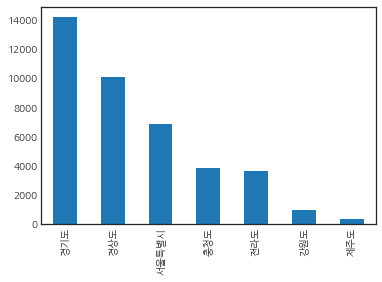

In [9]:
df_count = prem['거주지'].value_counts()
df_count.plot.bar()

In [10]:

고객ID	고객유형	생년	거주지	시	구군	남여구분	판매유형	계약유형	유통경로	...	월랜탈비용	계약상태	연체건수	연체여부	신용등급	결제은행	해약여부	연령대	계정수	계약수
0	66758234	개인	1979	경기도	경기도	평택시	여자	렌탈	일반	서비스 방문	...	96900	계약확정	0	없음	9	새마을금고	정상	40	1	30
1	66755948	개인	1982	경기도	경기도	평택시	남자	렌탈	교체렌탈	서비스 방문	...	102900	계약확정	0	없음	2	현대카드	정상	30	2	30
2	66756657	개인	1973	경기도	경기도	평택시	여자	렌탈	일반	홈쇼핑/방송	...	96900	계약확정	0	없음	8	우리은행	정상	40	1	30
3	66423450	개인	1982	경기도	경기도	포천시	남자	멤버십	멤버십S	렌탈재계약	...	66900	계약확정	0	없음	5	농협회원조합	정상	30	1	30
4	66423204	개인	1961	경기도	경기도	포천시	남자	멤버십	멤버십S	렌탈재계약	...	66900	해약확정	12	있음	8	농협회원조합	해약	50	1	30
prem['거주지'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

SyntaxError: invalid syntax (<ipython-input-10-66d0cd77383c>, line 1)

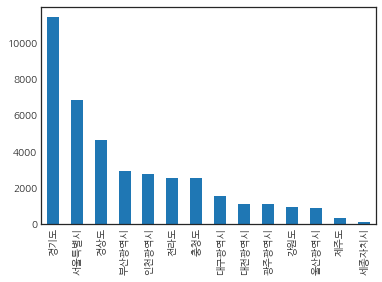

In [11]:
df_count = prem['시'].value_counts()
df_count.plot.bar()

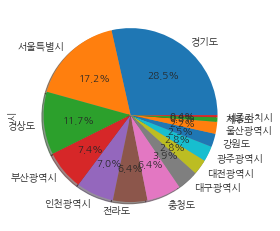

In [12]:
prem['시'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

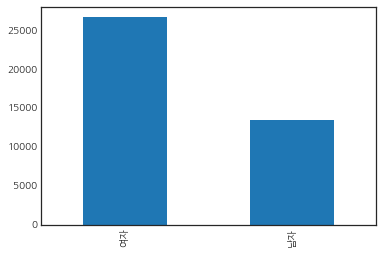

In [13]:
df_count = prem['남여구분'].value_counts()
df_count.plot.bar()

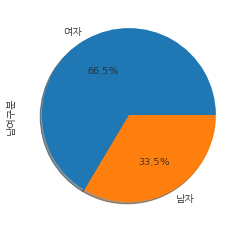

In [14]:
prem['남여구분'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

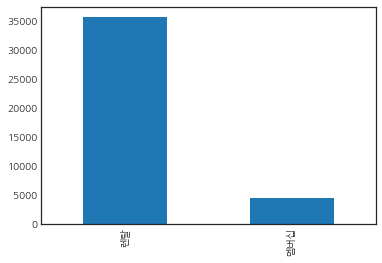

In [15]:
df_count = prem['판매유형'].value_counts()
df_count.plot.bar()

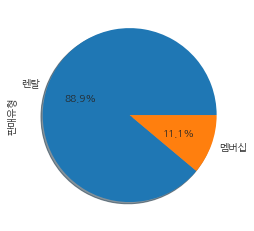

In [16]:
prem['판매유형'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

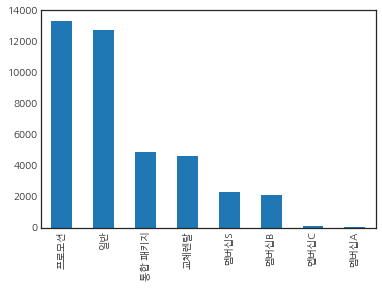

In [17]:
df_count = prem['계약유형'].value_counts()
df_count.plot.bar()

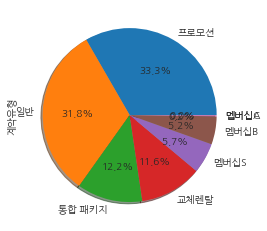

In [18]:
prem['계약유형'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

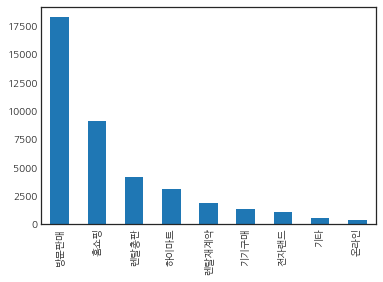

In [19]:
df_count = prem['유통경로'].value_counts()
df_count.plot.bar()

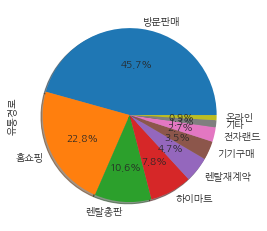

In [20]:
prem['유통경로'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

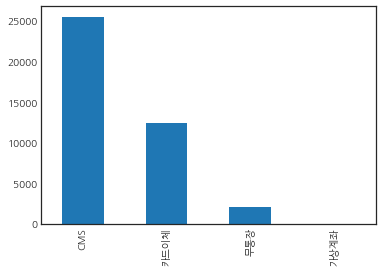

In [21]:
df_count = prem['납부유형'].value_counts()
df_count.plot.bar()

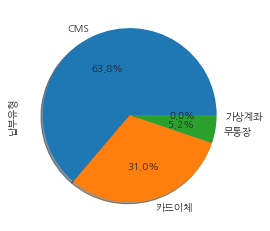

In [22]:
prem['납부유형'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

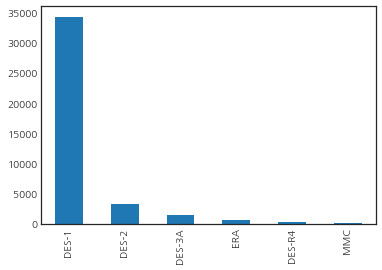

In [23]:
df_count = prem['제품군'].value_counts()
df_count.plot.bar()

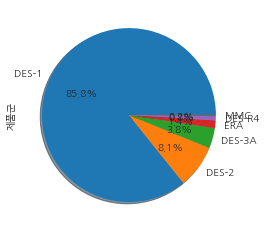

In [24]:
prem['제품군'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

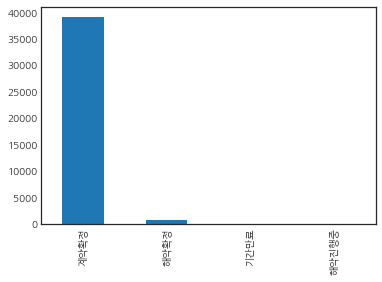

In [25]:
df_count = prem['계약상태'].value_counts()
df_count.plot.bar()

# 불균형 데이터

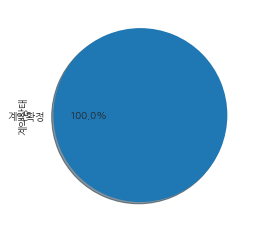

In [60]:
prem['계약상태'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

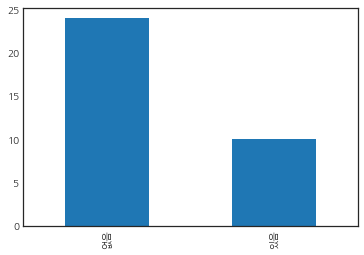

In [61]:
df_count = prem['연체여부'].value_counts()
df_count.plot.bar()

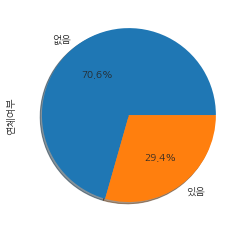

In [62]:
prem['연체여부'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

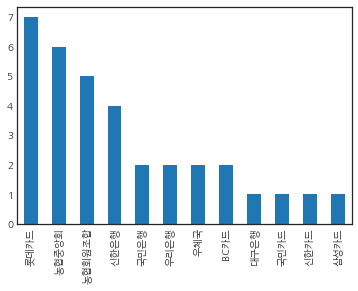

In [63]:
df_count = prem['결제은행'].value_counts()
df_count.plot.bar()

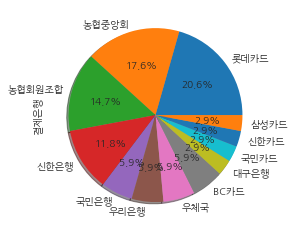

In [64]:
prem['결제은행'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

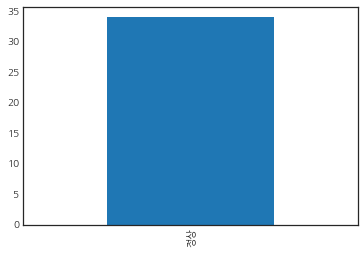

In [65]:
df_count = prem['해약여부'].value_counts()
df_count.plot.bar()

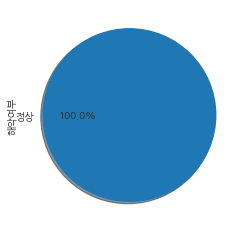

In [66]:
prem['해약여부'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

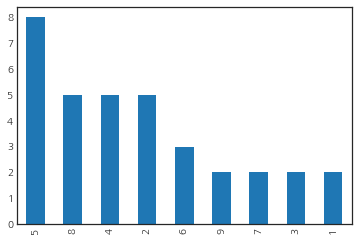

In [67]:
df_count = prem['신용등급'].value_counts()
df_count.plot.bar()

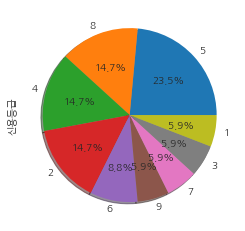

In [68]:
prem['신용등급'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

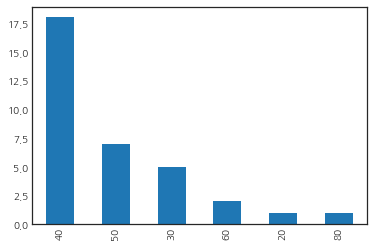

In [69]:
df_count = prem['연령대'].value_counts()
df_count.plot.bar()

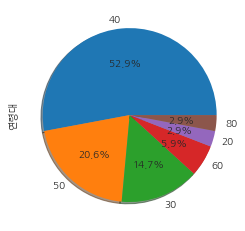

In [70]:
prem['연령대'].value_counts().plot.pie(autopct='%.1f%%', shadow=True)
plt.show()

# 해약여부에 따른 범주형 변수 그래프

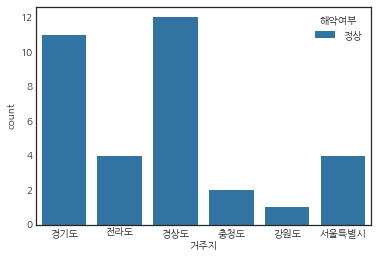

In [71]:
sns.countplot('거주지',hue='해약여부',data=prem)
plt.show()

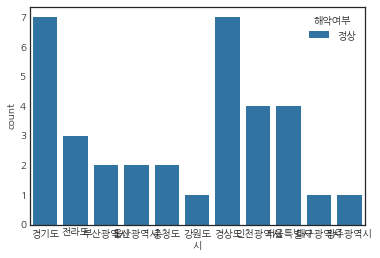

In [72]:
sns.countplot('시',hue='해약여부',data=prem)
plt.show()

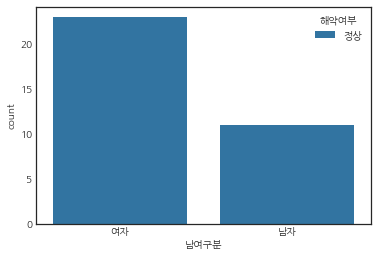

In [73]:
sns.countplot('남여구분',hue='해약여부',data=prem)
plt.show()

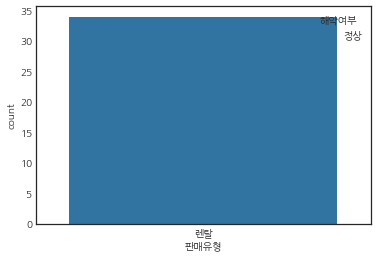

In [74]:
sns.countplot('판매유형',hue='해약여부',data=prem)
plt.show()

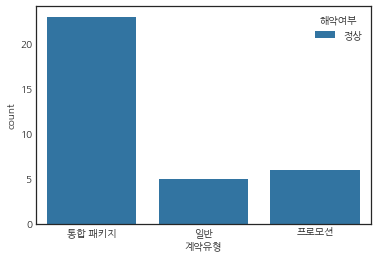

In [75]:
sns.countplot('계약유형',hue='해약여부',data=prem)
plt.show()

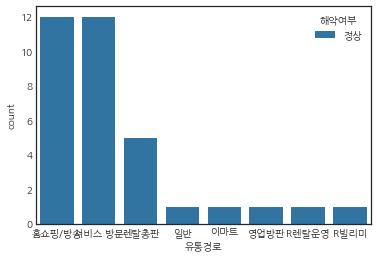

In [76]:
sns.countplot('유통경로',hue='해약여부',data=prem)
plt.show()

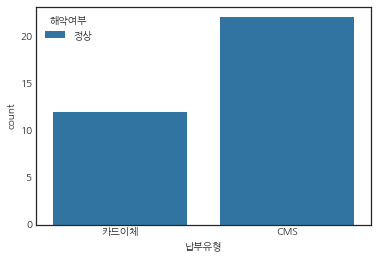

In [77]:
sns.countplot('납부유형',hue='해약여부',data=prem)
plt.show()

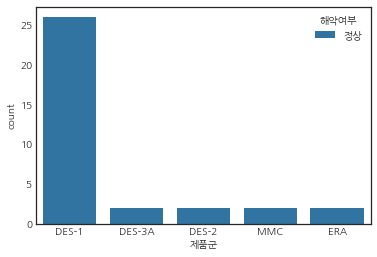

In [78]:
sns.countplot('제품군',hue='해약여부',data=prem)
plt.show()

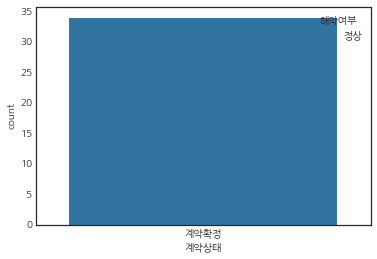

In [79]:
sns.countplot('계약상태',hue='해약여부',data=prem)
plt.show()

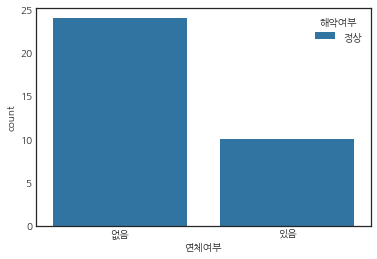

In [80]:
sns.countplot('연체여부',hue='해약여부',data=prem)
plt.show()

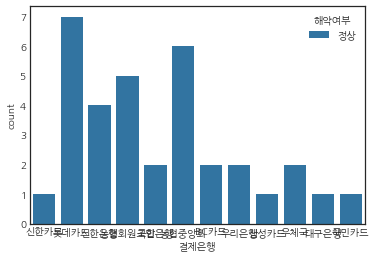

In [81]:
sns.countplot('결제은행',hue='해약여부',data=prem)
plt.show()

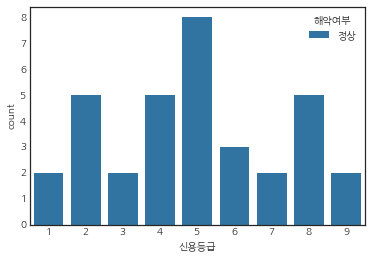

In [82]:
sns.countplot('신용등급',hue='해약여부',data=prem)
plt.show()

# 카이제곱 검정

In [83]:
a = pd.crosstab(prem['거주지'], prem['해약여부'], margins=True)
a

해약여부,정상,All
거주지,,
강원도,1,1
경기도,11,11
경상도,12,12
서울특별시,4,4
전라도,4,4
충청도,2,2
All,34,34


In [84]:
# c1 = [a.loc['경기도'][0],a.loc['경기도'][1]]
# c2 = [a.loc['경상도'][0],a.loc['경상도'][1]]
# _, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
# print(p_value)

In [85]:
a = pd.crosstab(prem['시'], prem['해약여부'], margins=True)
a

해약여부,정상,All
시,,
강원도,1,1
경기도,7,7
경상도,7,7
광주광역시,1,1
대구광역시,1,1
부산광역시,2,2
서울특별시,4,4
울산광역시,2,2
인천광역시,4,4


In [86]:
# c1 = [a.loc['경기도'][0],a.loc['경기도'][1]]
# c2 = [a.loc['서울특별시'][0],a.loc['서울특별시'][1]]
# _, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
# print(p_value)

In [87]:
a = pd.crosstab(prem['남여구분'], prem['해약여부'], margins=True)
a

해약여부,정상,All
남여구분,,
남자,11,11
여자,23,23
All,34,34


In [88]:
# c1 = [a.loc['남자'][0],a.loc['남자'][1]]
# c2 = [a.loc['여자'][0],a.loc['여자'][1]]
# _, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
# print(p_value)

In [89]:
a = pd.crosstab(prem['판매유형'], prem['해약여부'], margins=True)
a

해약여부,정상,All
판매유형,,
렌탈,34,34
All,34,34


In [90]:
# c1 = [a.loc['렌탈'][0],a.loc['렌탈'][1]]
# c2 = [a.loc['멤버십'][0],a.loc['멤버십'][1]]
# _, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
# print(p_value)

In [91]:
a = pd.crosstab(prem['계약유형'], prem['해약여부'], margins=True)
a

해약여부,정상,All
계약유형,,
일반,5,5
통합 패키지,23,23
프로모션,6,6
All,34,34


In [92]:
# c1 = [a.loc['일반'][0],a.loc['일반'][1]]
# c2 = [a.loc['프로모션'][0],a.loc['프로모션'][1]]
# _, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
# print(p_value)

In [93]:
a = pd.crosstab(prem['유통경로'], prem['해약여부'], margins=True)
a

해약여부,정상,All
유통경로,,
R렌탈운영,1,1
R빌리미,1,1
렌탈총판,5,5
서비스 방문,12,12
영업방판,1,1
이마트,1,1
일반,1,1
홈쇼핑/방송,12,12
All,34,34


In [94]:
# c1 = [a.loc['서비스 방문'][0],a.loc['서비스 방문'][1]]
# c2 = [a.loc['홈쇼핑/방송'][0],a.loc['홈쇼핑/방송'][1]]
# _, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
# print(p_value)

두집단간 해지율 차이 있다.

In [95]:
a = pd.crosstab(prem['납부유형'], prem['해약여부'], margins=True)
a

해약여부,정상,All
납부유형,,
CMS,22,22
카드이체,12,12
All,34,34


In [96]:
# c1 = [a.loc['CMS'][0],a.loc['CMS'][1]]
# c2 = [a.loc['카드이체'][0],a.loc['카드이체'][1]]
# _, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
# print(p_value)

CMS와 카드이체 간에 해지율 차이 있다.

In [97]:
a = pd.crosstab(prem['제품군'], prem['해약여부'], margins=True)
a

해약여부,정상,All
제품군,,
DES-1,26,26
DES-2,2,2
DES-3A,2,2
ERA,2,2
MMC,2,2
All,34,34


In [98]:
# c1 = [a.loc['DES-1'][0],a.loc['DES-1'][1]]
# c2 = [a.loc['DES-2'][0],a.loc['DES-2'][1]]
# _, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
# print(p_value)

두집단간 차이 있다.

In [99]:
a = pd.crosstab(prem['계약상태'], prem['해약여부'], margins=True)
a

해약여부,정상,All
계약상태,,
계약확정,34,34
All,34,34


In [100]:
# c1 = [a.loc['계약확정'][0],a.loc['계약확정'][1]]
# c2 = [a.loc['해약확정'][0],a.loc['해약확정'][1]]
# _, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
# print(p_value)

In [101]:
a = pd.crosstab(prem['연체여부'], prem['해약여부'], margins=True)
a

해약여부,정상,All
연체여부,,
없음,24,24
있음,10,10
All,34,34


In [102]:
# c1 = [a.loc['있음'][0],a.loc['있음'][1]]
# c2 = [a.loc['없음'][0],a.loc['없음'][1]]
# _, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
# print(p_value)

In [103]:
a = pd.crosstab(prem['결제은행'], prem['해약여부'], margins=True)
a

해약여부,정상,All
결제은행,,
BC카드,2,2
국민은행,2,2
국민카드,1,1
농협중앙회,6,6
농협회원조합,5,5
대구은행,1,1
롯데카드,7,7
삼성카드,1,1
신한은행,4,4


In [104]:
# c1 = [a.loc['롯데카드'][0],a.loc['롯데카드'][1]]
# c2 = [a.loc['국민카드'][0],a.loc['국민카드'][1]]
# _, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
# print(p_value)

In [105]:
a = pd.crosstab(prem['신용등급'], prem['해약여부'], margins=True)
a

해약여부,정상,All
신용등급,,
1,2,2
2,5,5
3,2,2
4,5,5
5,8,8
6,3,3
7,2,2
8,5,5
9,2,2


In [106]:
# c1 = [a.loc[1][0],a.loc[1][1]]
# c2 = [a.loc[10][0],a.loc[10][1]]
# _, p_value, _, _ = scipy.stats.chi2_contingency([c1, c2])
# print(p_value)

# 연속형 변수

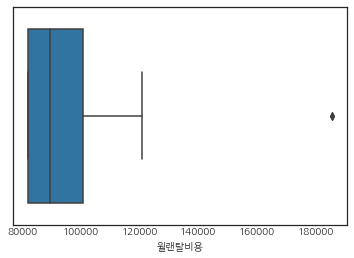

In [107]:
sns.boxplot(x=prem['월랜탈비용'])

In [108]:
# def ttest(x):
#     OUT = prem[prem['해약여부'] == '해약'][x] 
#     IN = prem[prem['해약여부'] == '정상'][x]
#     lresult = stats.levene(OUT.values, IN.values)
#     print('LeveneResult(F) : %.3f \np-value : %.3f' % (lresult))

# ttest('월랜탈비용')

In [109]:
OUT = prem[prem['연체여부']=='없음']['월랜탈비용'] 
IN = prem[prem['연체여부']=='있음']['월랜탈비용'] 

f_result = stats.f_oneway(OUT, IN)
f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print('One-way-ANOVA')
print('F검정통계량:{}'.format(f))
print('p-value:{}'.format(p))

One-way-ANOVA
F검정통계량:1.6
p-value:0.215


In [110]:
OUT = prem[prem['남여구분']=='남자']['월랜탈비용'] 
IN = prem[prem['남여구분']=='여자']['월랜탈비용'] 

f_result = stats.f_oneway(OUT, IN)
f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print('One-way-ANOVA')
print('F검정통계량:{}'.format(f))
print('p-value:{}'.format(p))

One-way-ANOVA
F검정통계량:0.606
p-value:0.442


In [111]:
df1 = prem[prem['계약기간']==60]['월랜탈비용'] 
df2 = prem[prem['계약기간']==36]['월랜탈비용'] 
df3 = prem[prem['계약기간']==39]['월랜탈비용'] 

f_result = stats.f_oneway(df1,df2,df3)
f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print('One-way-ANOVA')
print('F검정통계량:{}'.format(f))
print('p-value:{}'.format(p))

One-way-ANOVA
F검정통계량:nan
p-value:nan


/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3225: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


유의수준 5% 에서 검정결과 p값이 0.0 이므로 그룹간의 평균차이가 있다고 볼 수 있다.